In [2]:
import pandas as pd #Analyse et traitement des données
import matplotlib.pyplot as plt # création et visualisation graphique
from sklearn.linear_model import LinearRegression # Regression linéairé
import numpy as np #calcul mathématique
from sklearn.metrics import r2_score # calcul coeff de determination

In [3]:
# Définir le chemin d'accès au fichier
file_path = r'C:\Users\hp\OneDrive\Bureau\EMSI\3eme_Annee\S2\Modeles_Statistique\TPs\Housing_Data.csv'
# Charger les données dans un DataFrame
df = pd.read_csv(file_path)
# Verification des colonnes
print("colonnes du fichier CSV",df.columns)
#Exploration rapide des données
df.head()

colonnes du fichier CSV Index(['Unnamed: 0', 'Prix', 'Surface'], dtype='object')


,Unnamed: 0,Prix,Surface
0,0,458000,990
1,1,775000,1022
2,2,875000,1259
3,3,280000,699
4,4,410000,1184


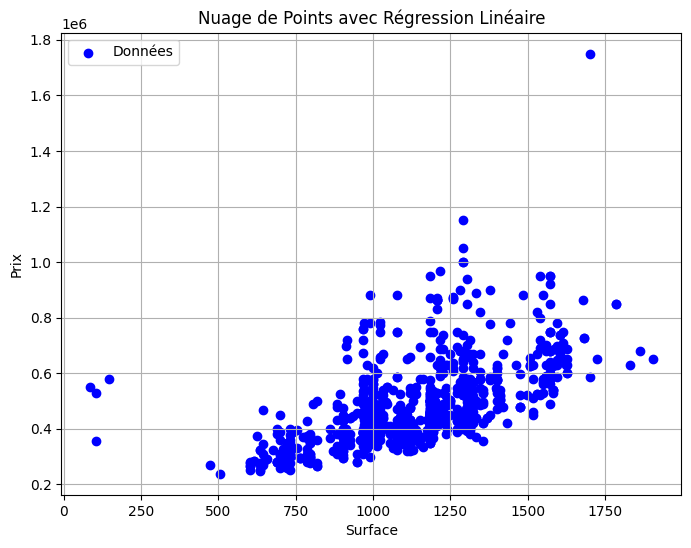

In [4]:
#définition des variables X et Y:
X=df[['Surface']] #la variable indépendante (m^2)
Y=df['Prix'] #la variable dépendante(DH)
#tracer le nuage de points
plt.figure(figsize=(8,6))
plt.scatter(X,Y, color='blue', label='Données') #tracer nuage de points
plt.title('Nuage de Points avec Régression Linéaire') #ajouter titre
plt.xlabel('Surface') #l'axe des abscisses
plt.ylabel('Prix') #Axe des ordonnées
plt.legend()
plt.grid(True) #ajouter grille pour une meilleur lisibilité
plt.show()

In [5]:
# Calcul des statistiques descriptives
moyenne_X = X.mean().iloc[0]
moyenne_Y = Y.mean()
variance_X = X.var().iloc[0]
variance_Y = Y.var()
covariance = np.cov(X.T,Y)[0][1]
correlation = np.corrcoef(X.T,Y)[0][1]
# Affichage des résultats
print("Statistiques descriptives :\n")
print(f"Moyenne de X (Surface) : {moyenne_X:.2f} m²")
print(f"Moyenne de Y (Prix) : {moyenne_Y:.2f} DH")
print(f"Variance de X : {variance_X:.2f}")
print(f"Variance de Y : {variance_Y:.2f}")
print(f"Covariance entre X et Y : {covariance:.2f}")
print(f"Corrélation entre X et Y : {correlation:.2f}")
print("Taille de la colonne :", X.size)
print("Taille de la colonne :", Y.size)

Statistiques descriptives :

Moyenne de X (Surface) : 1124.92 m²
Moyenne de Y (Prix) : 472248.35 DH
Variance de X : 61571.50
Variance de Y : 21589872802.00
Covariance entre X et Y : 21854352.20
Corrélation entre X et Y : 0.60
Taille de la colonne : 994
Taille de la colonne : 994


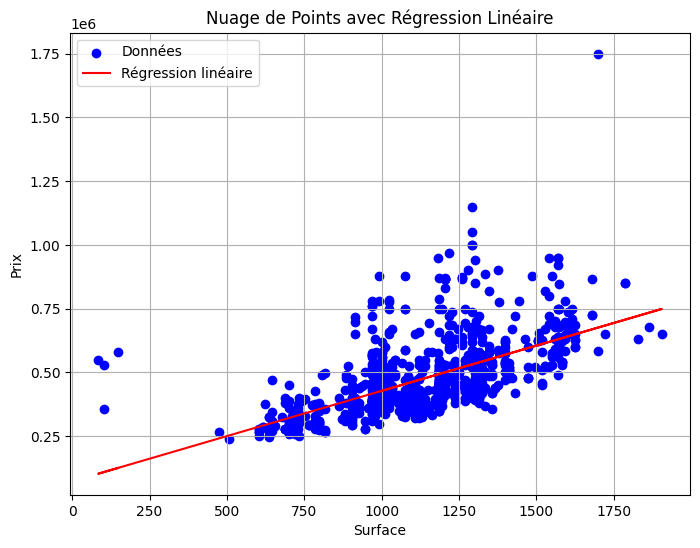

In [6]:
# Création du modèle de régression linéaire
model = LinearRegression()
# Entrainement du modèle
model.fit(X,Y)
# Prédiction les valeurs de y (prix) en fonction de X(surface)
y_pred = model.predict(X)
# Tracer la droite de regerssion sur le nuage de points
plt.figure(figsize=(8,6))
plt.scatter(X,Y, color='blue', label='Données') #tracer nuage de points
# Tracer la ligne de régression
plt.plot(X, y_pred, color='red', label='Régression linéaire')
plt.title('Nuage de Points avec Régression Linéaire') #ajouter titre
plt.xlabel('Surface') #l'axe des abscisses
plt.ylabel('Prix') #Axe des ordonnées
plt.legend()
plt.grid(True) #ajouter grille pour une meilleur lisibilité
plt.show()

In [7]:
# Afficher les coefficients de la régression
print(f"Coefficient (pente) : {model.coef_[0]}")
print(f"Ordonnée à l'origine : {model.intercept_}")

Coefficient (pente) : 354.94268141744163
Ordonnée à l'origine : 72966.75539450772


In [8]:
# Prédire le prix pour une surface de 150 m²
prix_prevu = model.predict([[150]])
# Afficher le résultat
print(f"Le prix prévu pour une surface de 150 m² est : {prix_prevu[0]:.2f}")

Le prix prévu pour une surface de 150 m² est : 126208.16


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
# calculer coeff de determination du modèle
R2=r2_score(Y,y_pred)
print(f"Coefficient de determination R^2= : {R2:.4f}")

Coefficient de determination R^2= : 0.3593
